# Desafio Telecom X

**Nombre del proyecto:** "Churn de Clientes"

**Descripción**

La empresa Telecom X enfrenta un alta tasa de cancelacion y necesita comprender los factores que le llevaa a esta perdida de clientes

Los datos usados para este analisis se extraen de la base de datos de cliente de la empresa, están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

## 1)   Extraccion de Datos


In [ ]:

import pandas as pd

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
df = pd.read_json(url)
display(df.sample(10))

,customerID,Churn,customer,phone,internet,account
270,0394-YONDK,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."
4695,6432-TWQLB,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6396,8780-RSYYU,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4317,5930-GBIWP,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."
856,1215-FIGMP,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
1757,2498-XLDZR,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."
2630,3665-JATSN,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'No', 'MultipleLines': 'No ph...","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4517,6194-HBGQN,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
2455,3422-WJOYD,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
2972,4123-FCVCB,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."


## 2.) Conoce el conjunto de Datos


In [ ]:
import requests

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_diccionario.md'
dicc = requests.get(url)
dicc.raise_for_status() # Raise an exception for bad status codes
markdown_content = dicc.text

print(markdown_content)

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: t

### Informacion general de Dataframe

In [ ]:
# Mostrar información general del DataFrame (columnas, tipos de datos, valores no nulos)
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


None

### Previsualizacion del dataframe

In [ ]:

# las cinco primeras muestras
# mas un sample de 10 muestras aleatorias
display(df.head())

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
print(f'muestras aleatorias del data set')
display(df.sample(10))

muestras aleatorias del data set


,customerID,Churn,customer,phone,internet,account
2239,3129-AAQOU,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."
1814,2585-KTFRE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3371,4683-WYDOU,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
609,0869-PAPRP,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5387,7359-PTSXY,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2150,3007-FDPEA,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5930,8097-VBQTZ,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4242,5834-ASPWA,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4382,6000-APYLU,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
1267,1820-TQVEV,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### Resultado de la revision preliminar del Dataframe

In [ ]:
# Detectamos cuatro columnas que contenian diccionario ('customer' , ''phone' , 'internet' y 'account')
# 1. normalizaremos para acceder a la informacion de cada diccionario
# 2. Luego asociaremos el resultado de cada diccionario a una nueva variable y estas a su ves las anexaremos a nuestro dataframe principal
#    omitiendo las columnas que no fueron normalizadas ('customesID' y ('Churn'))
# 3. por ultimno hecharemos un vistazo a la informacion general de este dataset para ver que nos encontramos

### Normalizar los Datos del dataframe para conocerlos mejor

#### 1. Normalizar diccionarios

In [ ]:
# normalizaremos para acceder a la informacion de cada diccionario

# estamos en la etapa inicial del analisis y lo que nos ocupa es la realizacion de un reconocimiento de datos
# el proceso de normalizar las columnas - Diccionarios = ('customer' , ''phone' , 'internet' y 'account')
# nos permite accesar a la informacion de cada uno de estos diccionarios para adentrarnos en la informacion almacenada en esta base de datos



# Normalize the 'customer' column
customer_df = pd.json_normalize(df['customer'])

# Normalize the 'phone' column
phone_df = pd.json_normalize(df['phone'])

# Normalize the 'internet' column
internet_df = pd.json_normalize(df['internet'])

# Normalize the 'account' column
account_df = pd.json_normalize(df['account'])



#### 2. Diccionario Normalizado y deteccion de inconsistencias




In [ ]:
# 2. Luego asociaremos el resultado de cada diccionario a una nueva variable y estas a su ves las anexaremos a nuestro dataframe principal
#    omitiendo las columnas que no fueron normalizadas ('customesID' y ('Churn')) y sacaremos una muestra para ver el re


# Concatenar los marcos de datos normalizados con el marco de datos original (excluyendo las columnas anidadas originales)
df_flat = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

display(df_flat.sample(8))



,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
5876,8035-BUYVG,Yes,Male,0,Yes,No,40,No,No phone service,DSL,...,Yes,Yes,No,No,No,One year,Yes,Electronic check,42.35,1716.45
3986,5447-WZAFP,No,Female,0,No,No,53,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Mailed check,100.30,5200.8
6038,8242-JSVBO,No,Male,0,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.65,322.5
4525,6202-DYYFX,No,Female,0,No,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,No,One year,Yes,Credit card (automatic),76.00,1783.6
1254,1794-SWWKL,No,Male,0,Yes,Yes,15,Yes,Yes,DSL,...,No,Yes,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),59.65,867.1
638,0909-SDHNU,No,Female,0,No,Yes,7,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,No,Mailed check,29.80,201.95
2219,3096-JRDSO,Yes,Female,1,Yes,No,27,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),104.30,2867.75
5206,7108-DGVUU,No,Female,1,Yes,No,21,Yes,Yes,DSL,...,Yes,Yes,No,No,Yes,One year,No,Bank transfer (automatic),71.70,1497.05


#### 3. Previsualizacion info general dataframe normalizado

In [ ]:
# 3. por ultimno hecharemos un vistazo a la informacion general de este dataset para ver que nos encontramos

# Vizualizando del tipo de datos de todas las columnas incluidas las columnas almacenadas en cada diccionario
display(df_flat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


None

## 3.) Inconsistencias Detectadas

In [ ]:
 # vemos que no todos los nombres de nuestras columnas estan escritos en miniscula
 # asi que los nombrews de cada columna estaran completamente en minuscula


### 1. Identificar valores ausentes (NaN)


In [ ]:
# 1. Identificar valores ausentes (NaN)
print("--- Valores Ausentes ---")
display(df_flat.isnull().sum())

--- Valores Ausentes ---


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


### # 2. Identificar filas duplicadas


In [ ]:

# 2. Identificar filas duplicadas
print("\n--- Filas Duplicadas ---")
duplicate_rows = df_flat.duplicated().sum()
print(f"Número de filas duplicadas: {duplicate_rows}")


--- Filas Duplicadas ---
Número de filas duplicadas: 0


### 3. Revisar tipos de datos e informacion general del dataframe

In [ ]:

# 3. Revisar tipos de datos e informacion general del dataframe
print("\n--- Información General y Tipos de Datos ---")
display(df_flat.info())

print("\n--- Valores Únicos en Columnas Categóricas (ejemplo) ---")


--- Información General y Tipos de Datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 

None


--- Valores Únicos en Columnas Categóricas (ejemplo) ---


### Mostrar valores únicos para todas las columnas en el DataFrame


In [ ]:
# Mostrar valores únicos para todas las columnas en el DataFrame
for col in df_flat.columns:
    print(f"\nValores únicos en '{col}':")
    display(df_flat[col].unique())


Valores únicos en 'customerID':


array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)


Valores únicos en 'Churn':


array(['No', 'Yes', ''], dtype=object)


Valores únicos en 'gender':


array(['Female', 'Male'], dtype=object)


Valores únicos en 'SeniorCitizen':


array([0, 1])


Valores únicos en 'Partner':


array(['Yes', 'No'], dtype=object)


Valores únicos en 'Dependents':


array(['Yes', 'No'], dtype=object)


Valores únicos en 'tenure':


array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])


Valores únicos en 'PhoneService':


array(['Yes', 'No'], dtype=object)


Valores únicos en 'MultipleLines':


array(['No', 'Yes', 'No phone service'], dtype=object)


Valores únicos en 'InternetService':


array(['DSL', 'Fiber optic', 'No'], dtype=object)


Valores únicos en 'OnlineSecurity':


array(['No', 'Yes', 'No internet service'], dtype=object)


Valores únicos en 'OnlineBackup':


array(['Yes', 'No', 'No internet service'], dtype=object)


Valores únicos en 'DeviceProtection':


array(['No', 'Yes', 'No internet service'], dtype=object)


Valores únicos en 'TechSupport':


array(['Yes', 'No', 'No internet service'], dtype=object)


Valores únicos en 'StreamingTV':


array(['Yes', 'No', 'No internet service'], dtype=object)


Valores únicos en 'StreamingMovies':


array(['No', 'Yes', 'No internet service'], dtype=object)


Valores únicos en 'Contract':


array(['One year', 'Month-to-month', 'Two year'], dtype=object)


Valores únicos en 'PaperlessBilling':


array(['Yes', 'No'], dtype=object)


Valores únicos en 'PaymentMethod':


array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)


Valores únicos en 'Charges.Monthly':


array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])


Valores únicos en 'Charges.Total':


array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

### Convertir todos los nombres de las columnas a minúsculas

In [ ]:
# Convertir todos los nombres de las columnas a minúsculas y reemplazar '.' o espacios con '_'
df_flat.columns = df_flat.columns.str.lower().str.replace('[.\s]', '_', regex=True)

# Renombrar columnas específicas
rename_map = {
    'customerid': 'customer_id',
    'seniorcitizen': 'senior_citizen',
    'phoneservice': 'phone_service',
    'multiplelines': 'multiple_lines',
    'internetservice': 'internet_service',
    'onlinebackup': 'online_backup',
    'deviceprotection': 'device_protection',
    'techsupport': 'tech_support',
    'streamingtv': 'streaming_tv',
    'streamingmovies': 'streaming_movies',
    'paperlessbilling': 'paperless_billing',
    'paymentmethod': 'payment_method',
    'onlinesecurity' : 'online_security'
}
df_flat.rename(columns=rename_map, inplace=True)


display(df_flat.sample(1))

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
1562,2232-DMLXU,Yes,Female,0,Yes,No,1,Yes,No,DSL,...,No,No,No,Yes,No,Month-to-month,No,Mailed check,55.2,55.2


### Conversion tipo de Dato

In [ ]:
# Lista de columnas candidatas para convertir a tipo 'category'
categorical_cols_to_convert = [
    'gender',
    'phone_service',
    'multiple_lines',
    'internet_service',
    'online_security',
    'online_backup',
    'device_protection',
    'tech_support',
    'streaming_tv',
    'streaming_movies',
    'contract',
    'paperless_billing',
    'payment_method',
    # 'churn' - Se omite la conversión de 'churn' a categórica
    # porque para analistas de datos, especialmente en tareas de modelado predictivo,
    # es común trabajar con la variable objetivo (como 'churn') en su formato original (object o int/float si es binaria)
    # o convertirla a un tipo numérico binario (0/1) más adelante en el proceso.
    # Mantenerla como 'object' en esta etapa inicial permite flexibilidad antes de decidir su representación final.
]

# Convertir las columnas a tipo 'category'
for col in categorical_cols_to_convert:
    if col in df_flat.columns: # Verificar que la columna existe
        df_flat[col] = df_flat[col].astype('category')

# Mostrar los tipos de datos después de la conversión para verificar
print("Tipos de datos después de convertir columnas categóricas:")
display(df_flat.dtypes)

Tipos de datos después de convertir columnas categóricas:


,0
customer_id,object
churn,object
gender,category
senior_citizen,int64
partner,object
dependents,object
tenure,int64
phone_service,category
multiple_lines,category
internet_service,category


### 4. Columna Cuentas Diarias



Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [ ]:
# Crear la columna 'daily_accounts' calculando el valor diario de 'charges_monthly'
# Usamos un promedio de 30.44 días por mes (365.25 / 12)
df_flat['daily_accounts'] = (df_flat['charges_monthly'] / 30.44).round(1)

# Mostrar las primeras filas con la nueva columna para verificar
display(df_flat[['charges_monthly', 'daily_accounts']].head())


,charges_monthly,daily_accounts
0,65.6,2.2
1,59.9,2.0
2,73.9,2.4
3,98.0,3.2
4,83.9,2.8


### 5. Estandarizacion Transformacion de Datos

La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

#### Conversion a Binario

In [ ]:
# Identificar columnas con valores 'Yes'/'No' (excluyendo 'Churn' por ahora si se va a usar como target)
# y excluye tambien columnas con 'No phone service' o 'No internet service' que tienen más de dos categorías

# Obtener la lista de columnas con solo 'Yes' y 'No'
yes_no_cols = [col for col in df_flat.columns if df_flat[col].isin(['Yes', 'No']).all()]

# Excluir 'churn' si está presente (ya que a menudo se maneja por separado como variable objetivo)
if 'churn' in yes_no_cols:
    yes_no_cols.remove('churn')

# Excluir columnas que sabemos que tienen más de dos categorías (como las que tenían 'No phone service' o 'No internet service')
# Podemos verificar esto por si acaso, aunque ya las hemos manejado de alguna manera antes
cols_to_exclude = ['phone_service', 'multiple_lines', 'internet_service', 'contract', 'payment_method'] # Añade otras si es necesario
yes_no_cols = [col for col in yes_no_cols if col not in cols_to_exclude]

# Convertir 'Yes' a 1 y 'No' a 0 en las columnas identificadas en df_flat
for col in yes_no_cols:
    df_flat[col] = df_flat[col].map({'Yes': 1, 'No': 0})

# Mostrar las primeras filas de df_flat para verificar la transformación
display(df_flat.sample(200))

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,daily_accounts
3818,5226-NOZFC,No,Male,0,0,0,26,Yes,No,Fiber optic,...,No,No,Yes,No,Month-to-month,1,Electronic check,85.75,2146.5,2.8
2574,3588-WSTTJ,No,Female,1,0,0,35,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,Month-to-month,1,Electronic check,99.05,3554.6,3.3
4137,5671-RQRLP,No,Female,1,1,0,70,Yes,Yes,Fiber optic,...,No,No,No,No,Two year,1,Credit card (automatic),75.65,5411.4,2.5
173,0270-THENM,No,Male,0,1,1,72,Yes,Yes,DSL,...,Yes,Yes,No,No,Two year,0,Bank transfer (automatic),69.85,5102.35,2.3
5231,7134-MJPDY,No,Female,1,0,0,66,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,One year,1,Credit card (automatic),102.85,6976.75,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5902,8064-RAVOH,No,Male,0,0,1,1,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,1,Electronic check,49.85,49.85,1.6
562,0804-YGEQV,No,Female,0,1,1,43,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,One year,1,Bank transfer (automatic),24.45,993.15,0.8
4163,5701-ZIKJE,No,Male,0,0,0,13,Yes,No,DSL,...,No,Yes,No,No,Month-to-month,1,Mailed check,50.55,610.75,1.7
5819,7964-YESJC,No,Female,0,1,0,24,Yes,Yes,DSL,...,Yes,No,No,No,Month-to-month,0,Mailed check,66.30,1559.45,2.2


#### Opcionales

In [ ]:
# Opcional: Revisar si hay valores no numéricos en columnas que deberían ser numéricas
print("\n--- Comprobación de Valores no Numéricos en Columnas Numéricas ---")

# Identificar columnas que se espera que sean numéricas (excluyendo 'customer_id')
numeric_cols_to_check = ['tenure', 'charges_monthly', 'charges_total', 'daily_accounts']

for col in numeric_cols_to_check:
    if col in df_flat.columns:
        try:
            # Intenta convertir la columna a numérico, los errores indicarán valores no numéricos
            pd.to_numeric(df_flat[col])
            print(f"La columna '{col}' es completamente numérica.")
        except ValueError as e:
            print(f"Se encontraron valores no numéricos en '{col}': {e}")
            # Para ver los valores no numéricos, puedes usar:
            non_numeric_values = df_flat[pd.to_numeric(df_flat[col], errors='coerce').isna()][col].unique()
            print(f"Ejemplos de valores no numéricos en '{col}':")
            display(non_numeric_values)

# *** APLICAR CORRECCIÓN A charges_total DIRECTAMENTE EN df_flat ***
# Identificamos que 'charges_total' tiene valores ' '
# Convertir 'charges_total' a numérico, reemplazando ' ' (que se convierten a NaN por errors='coerce') con 0 o la media,
# pero primero vamos a reemplazar explícitamente los ' ' con NaN
df_flat['charges_total'] = df_flat['charges_total'].replace(' ', pd.NA) # Reemplazar ' ' con NaN

# Ahora convertir a numérico. Los NaN se mantendrán como NaN.
df_flat['charges_total'] = pd.to_numeric(df_flat['charges_total'])

# Opcional: Rellenar los valores NaN creados en 'charges_total' si es necesario (ej. con 0 o la media)
# Por ahora, solo nos aseguraremos de que sea numérico y tenga NaN donde antes había ' '
# Si decides rellenar, podrías usar: df_flat['charges_total'].fillna(0, inplace=True) o df_flat['charges_total'].fillna(df_flat['charges_total'].mean(), inplace=True)

# Verificar el tipo de dato después de la conversión
print("\nTipo de dato de 'charges_total' después de la corrección:")
print(df_flat['charges_total'].dtype)

print("\nVerificar valores nulos en 'charges_total' después de reemplazar ' ' con NaN:")
display(df_flat['charges_total'].isnull().sum())


--- Comprobación de Valores no Numéricos en Columnas Numéricas ---
La columna 'tenure' es completamente numérica.
La columna 'charges_monthly' es completamente numérica.
Se encontraron valores no numéricos en 'charges_total': Unable to parse string " " at position 975
Ejemplos de valores no numéricos en 'charges_total':


array([' '], dtype=object)

La columna 'daily_accounts' es completamente numérica.

Tipo de dato de 'charges_total' después de la corrección:
float64

Verificar valores nulos en 'charges_total' después de reemplazar ' ' con NaN:


np.int64(11)

#### # Convertir 'churn' a binario (Yes=1, No=0) y reemplazar '' con NaN


In [ ]:
# Generando el grafico del siguiente punto note un valor adicional en la columna
#Check unique values in the 'churn' column
print("Valores únicos en la columna 'churn':")
display(df_flat['churn'].unique())
# df_flat.sample(5) # No mostramos sample aquí para enfocarnos en la corrección


# *** APLICAR CORRECCIÓN A churn DIRECTAMENTE EN df_flat ***
# Vemos que 'churn' tiene valores '', 'No', 'Yes'. Queremos convertir a binario y manejar '' como NaN.
# Convertir '' a None (NaN)
df_flat['churn'] = df_flat['churn'].replace('', None)

# Convertir 'Yes' a 1 y 'No' a 0, forzando a NaN cualquier valor no numérico restante
# Los NaN (que antes eran '') se mantendrán como NaN en este paso.
df_flat['churn'] = pd.to_numeric(df_flat['churn'].replace({'Yes': 1, 'No': 0}), errors='coerce')


# Opcional: Eliminar o rellenar filas donde 'churn' es NaN si es necesario.
# Si decides eliminar, puedes usar: df_flat.dropna(subset=['churn'], inplace=True)
# Si decides rellenar, puedes usar: df_flat['churn'].fillna(valor, inplace=True)
# Por ahora, solo nos aseguraremos de que sea numérico y tenga NaN donde antes había ''

# Verificar valores únicos y tipo de dato después de la corrección
print("\nValores únicos en la columna 'churn' después de la corrección:")
display(df_flat['churn'].unique())
print("\nTipo de dato de 'churn' después de la corrección:")
print(df_flat['churn'].dtype)
print("\nVerificar valores nulos en 'churn' después de reemplazar '' con NaN:")
display(df_flat['churn'].isnull().sum())

Valores únicos en la columna 'churn':


array(['No', 'Yes', ''], dtype=object)


Valores únicos en la columna 'churn' después de la corrección:


/tmp/ipython-input-119-684479899.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_flat['churn'] = pd.to_numeric(df_flat['churn'].replace({'Yes': 1, 'No': 0}), errors='coerce')


array([ 0.,  1., nan])


Tipo de dato de 'churn' después de la corrección:
float64

Verificar valores nulos en 'churn' después de reemplazar '' con NaN:


np.int64(224)

## C)  Carga y Analisis L - Load & Analysis

### Analisis descriptivo

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

📌 Consejos:

🔗 Documentación de DataFrame.describe()

In [ ]:
# Realizar análisis descriptivo del DataFrame df_flat
display(df_flat.describe())

,churn,senior_citizen,partner,dependents,tenure,charges_monthly,charges_total,daily_accounts
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,64.720098,2280.634213,2.127329
std,0.441561,0.369074,0.499782,0.458343,24.571773,30.129572,2268.632997,0.989183
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.600000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,35.425000,400.225000,1.200000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,70.300000,1391.000000,2.300000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,89.875000,3785.300000,3.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,118.750000,8684.800000,3.900000


### Distribucion de Evasion

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

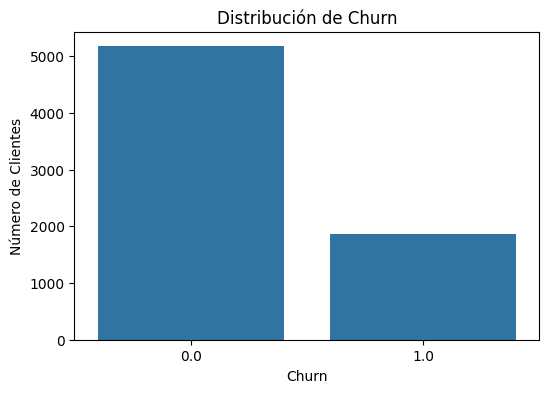

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de clientes por cada valor de 'churn'
churn_counts = df_flat['churn'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Distribución de Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()

### Recuento de evasión por variables categóricas

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

Generando gráficos de tasa de churn para las siguientes columnas categóricas:


['gender',
 'phone_service',
 'multiple_lines',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'contract',
 'paperless_billing',
 'payment_method']


Generando gráfico para 'gender':


/tmp/ipython-input-122-296404456.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_flat_cleaned.groupby(col)['churn'].mean().sort_values(ascending=False)
/tmp/ipython-input-122-296404456.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


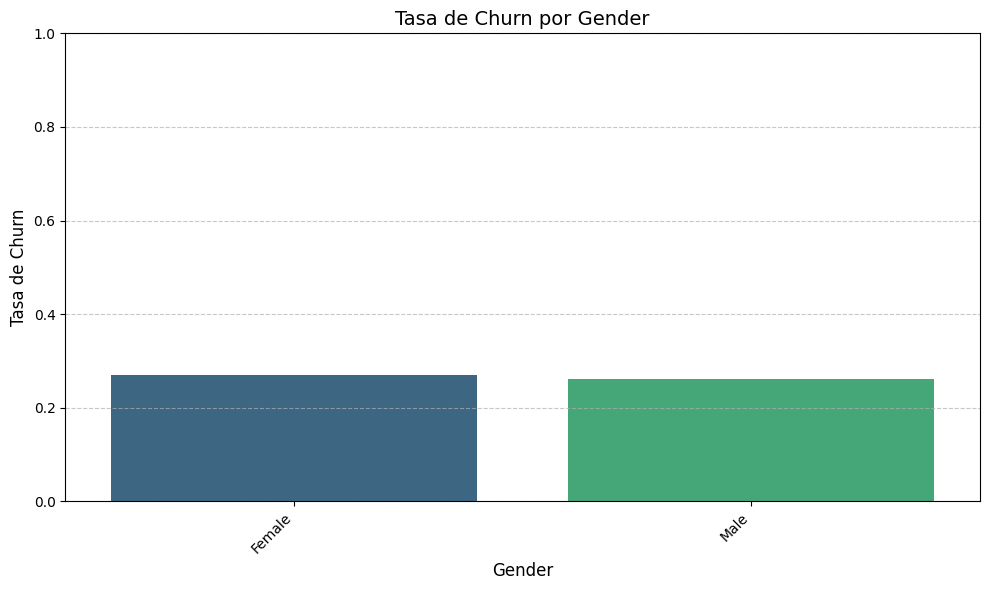


Generando gráfico para 'phone_service':


/tmp/ipython-input-122-296404456.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_flat_cleaned.groupby(col)['churn'].mean().sort_values(ascending=False)
/tmp/ipython-input-122-296404456.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


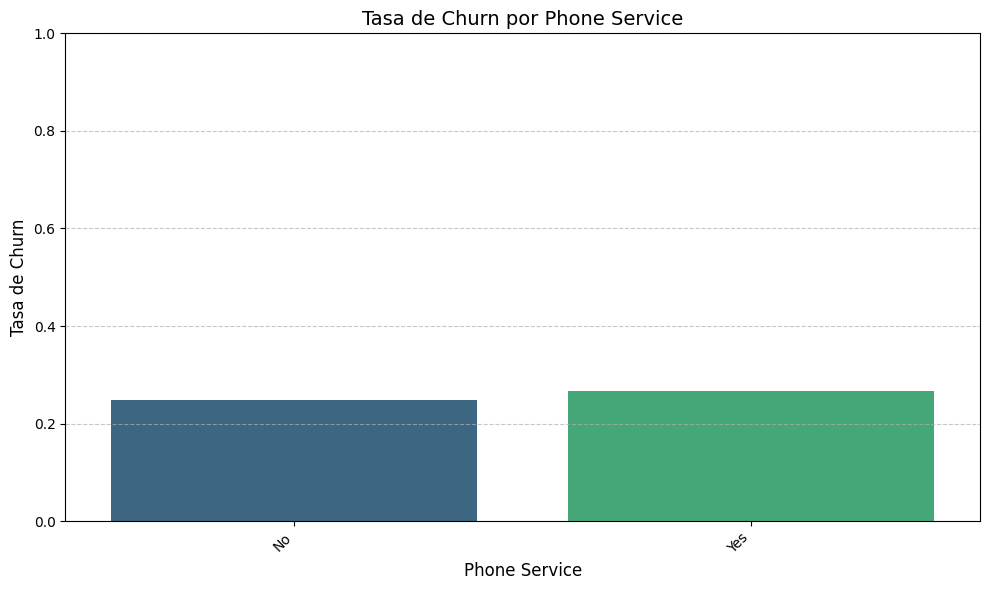


Generando gráfico para 'multiple_lines':


/tmp/ipython-input-122-296404456.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_flat_cleaned.groupby(col)['churn'].mean().sort_values(ascending=False)
/tmp/ipython-input-122-296404456.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


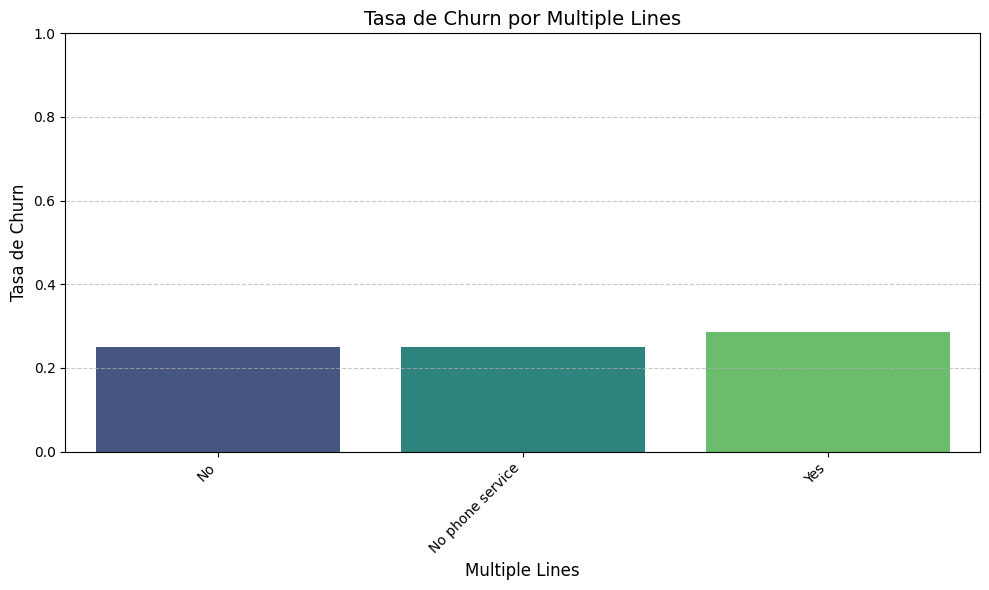


Generando gráfico para 'internet_service':


/tmp/ipython-input-122-296404456.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_flat_cleaned.groupby(col)['churn'].mean().sort_values(ascending=False)
/tmp/ipython-input-122-296404456.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


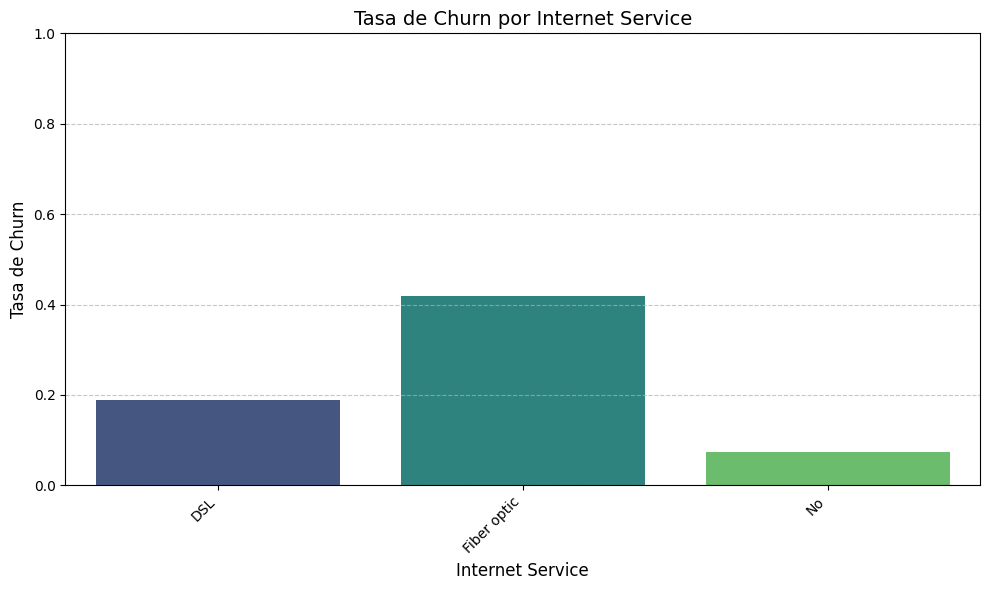


Generando gráfico para 'online_security':


/tmp/ipython-input-122-296404456.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_flat_cleaned.groupby(col)['churn'].mean().sort_values(ascending=False)
/tmp/ipython-input-122-296404456.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


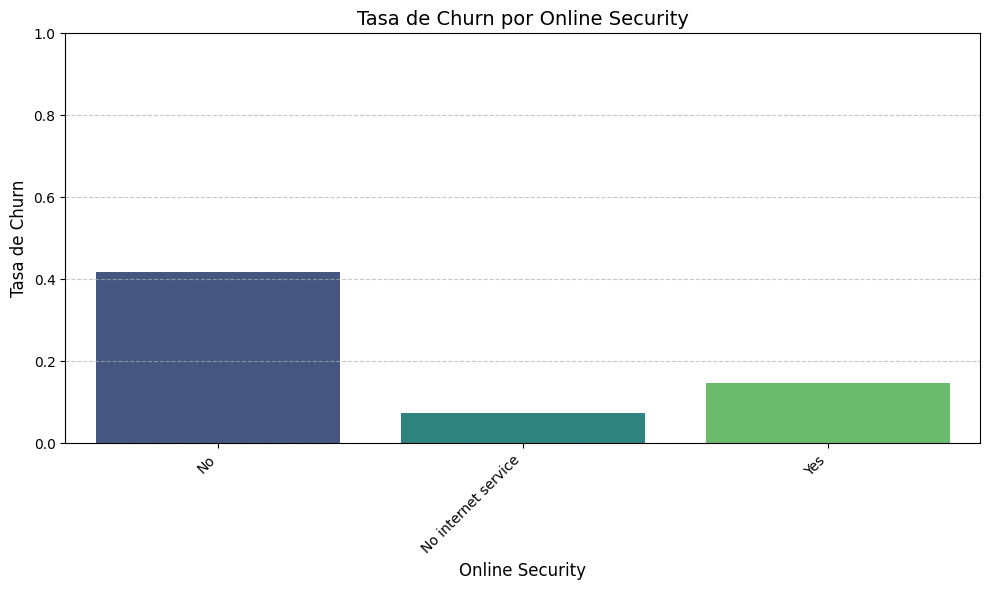


Generando gráfico para 'online_backup':


/tmp/ipython-input-122-296404456.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_flat_cleaned.groupby(col)['churn'].mean().sort_values(ascending=False)
/tmp/ipython-input-122-296404456.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


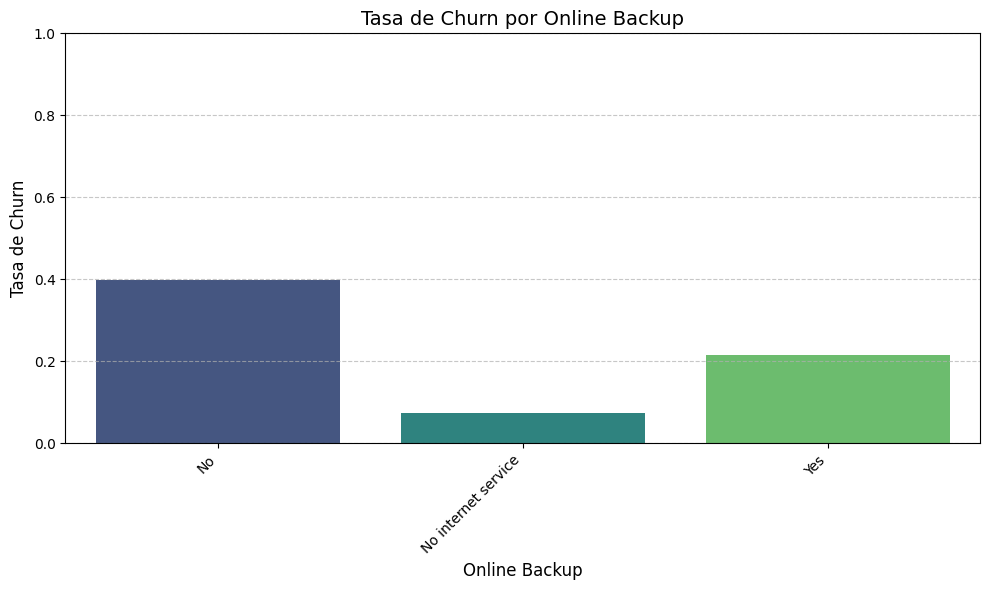


Generando gráfico para 'device_protection':


/tmp/ipython-input-122-296404456.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_flat_cleaned.groupby(col)['churn'].mean().sort_values(ascending=False)
/tmp/ipython-input-122-296404456.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


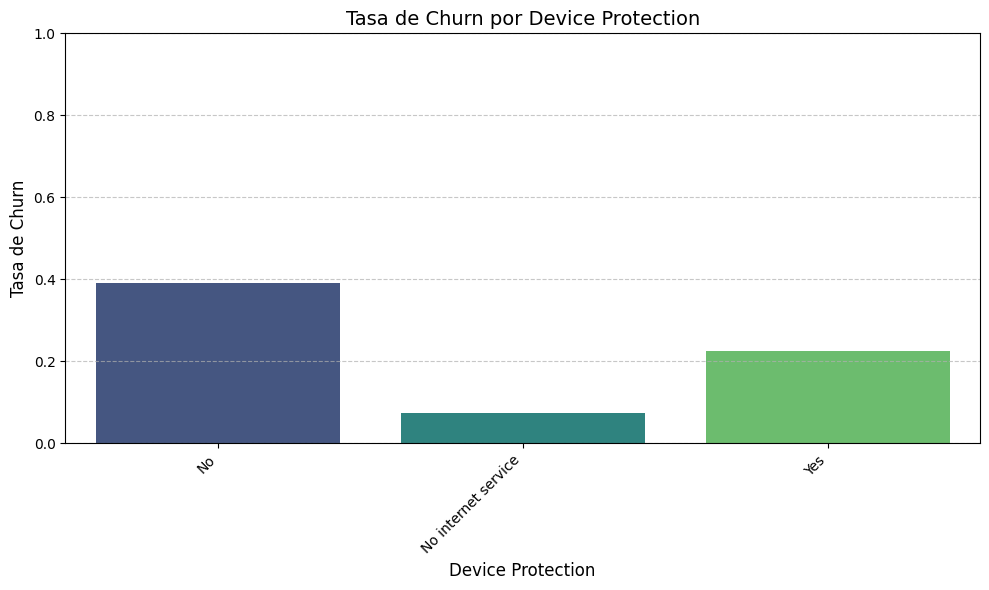


Generando gráfico para 'tech_support':


/tmp/ipython-input-122-296404456.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_flat_cleaned.groupby(col)['churn'].mean().sort_values(ascending=False)
/tmp/ipython-input-122-296404456.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


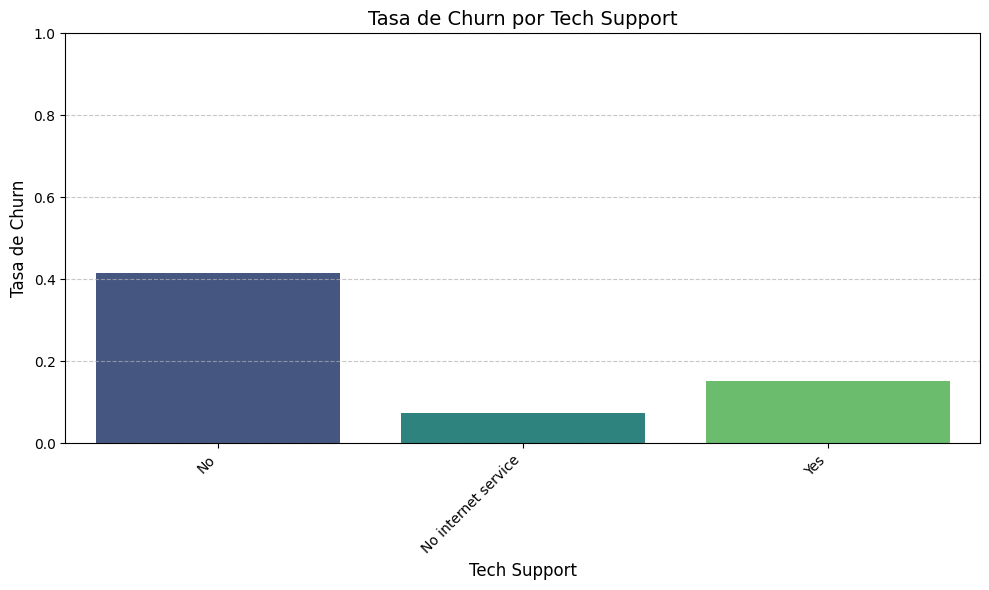


Generando gráfico para 'streaming_tv':


/tmp/ipython-input-122-296404456.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_flat_cleaned.groupby(col)['churn'].mean().sort_values(ascending=False)
/tmp/ipython-input-122-296404456.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


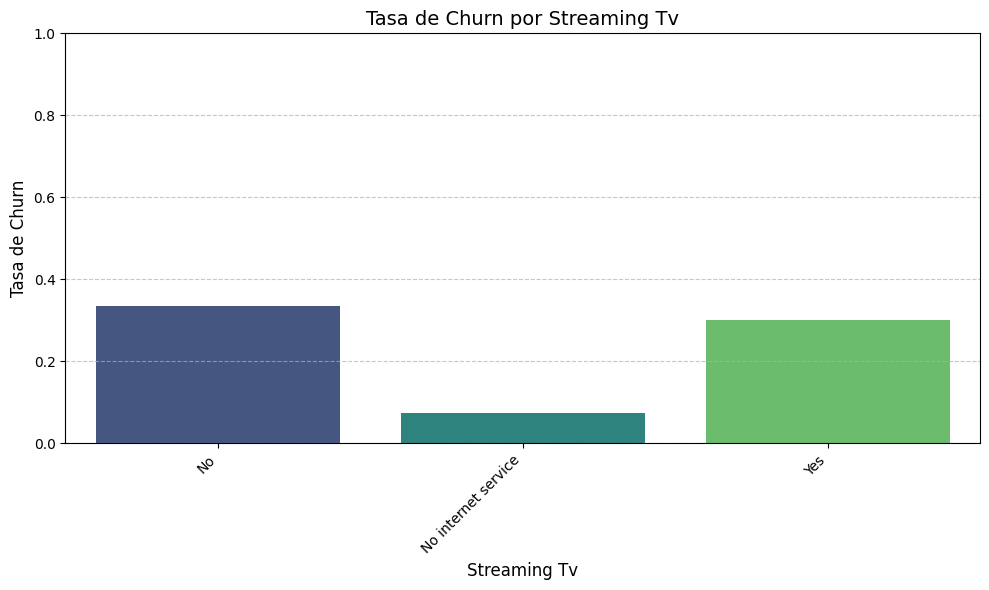


Generando gráfico para 'streaming_movies':


/tmp/ipython-input-122-296404456.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_flat_cleaned.groupby(col)['churn'].mean().sort_values(ascending=False)
/tmp/ipython-input-122-296404456.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


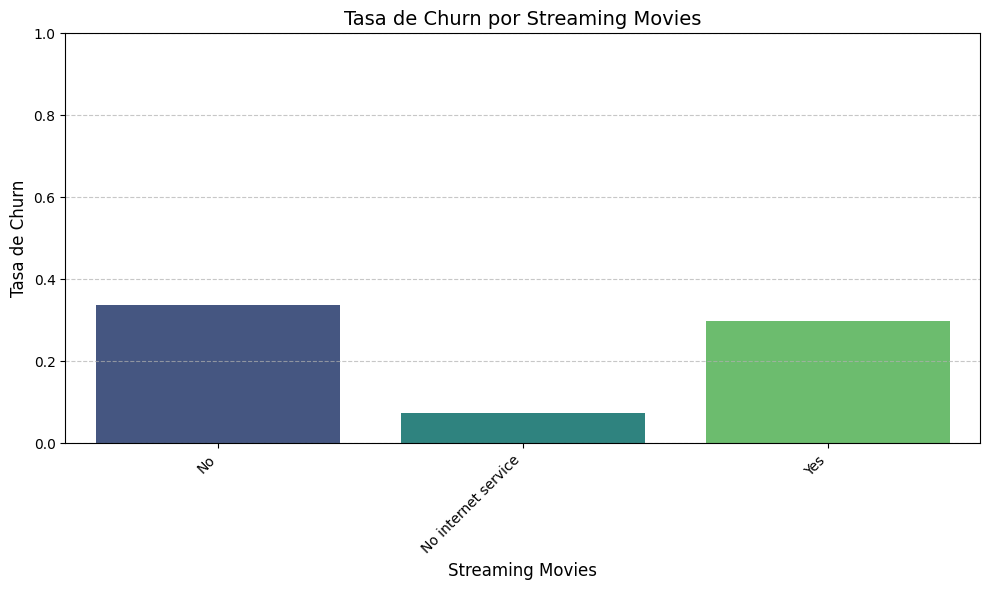


Generando gráfico para 'contract':


/tmp/ipython-input-122-296404456.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_flat_cleaned.groupby(col)['churn'].mean().sort_values(ascending=False)
/tmp/ipython-input-122-296404456.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


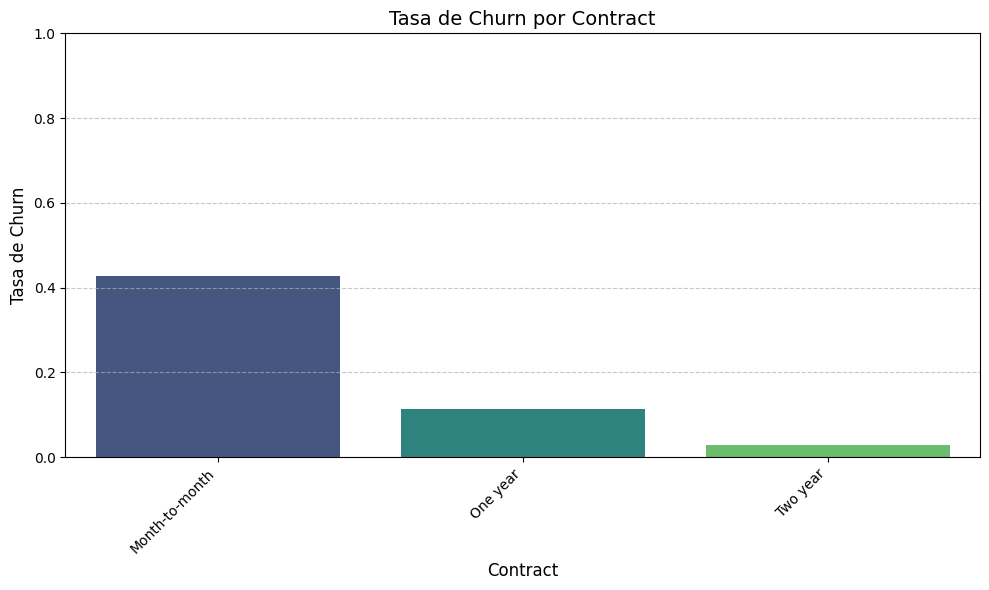


Generando gráfico para 'paperless_billing':


/tmp/ipython-input-122-296404456.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_flat_cleaned.groupby(col)['churn'].mean().sort_values(ascending=False)
/tmp/ipython-input-122-296404456.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


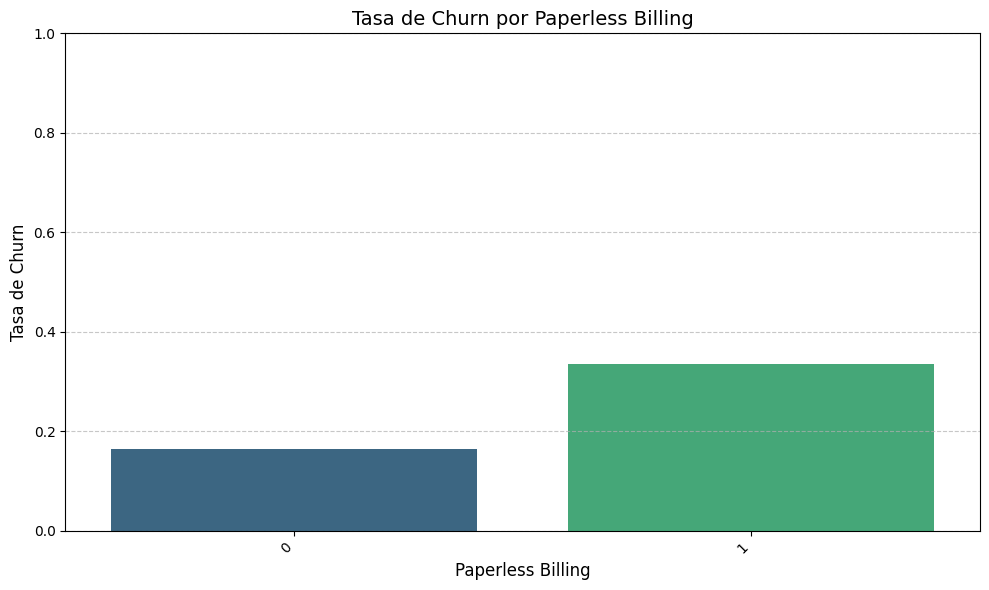


Generando gráfico para 'payment_method':


/tmp/ipython-input-122-296404456.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_category = df_flat_cleaned.groupby(col)['churn'].mean().sort_values(ascending=False)
/tmp/ipython-input-122-296404456.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


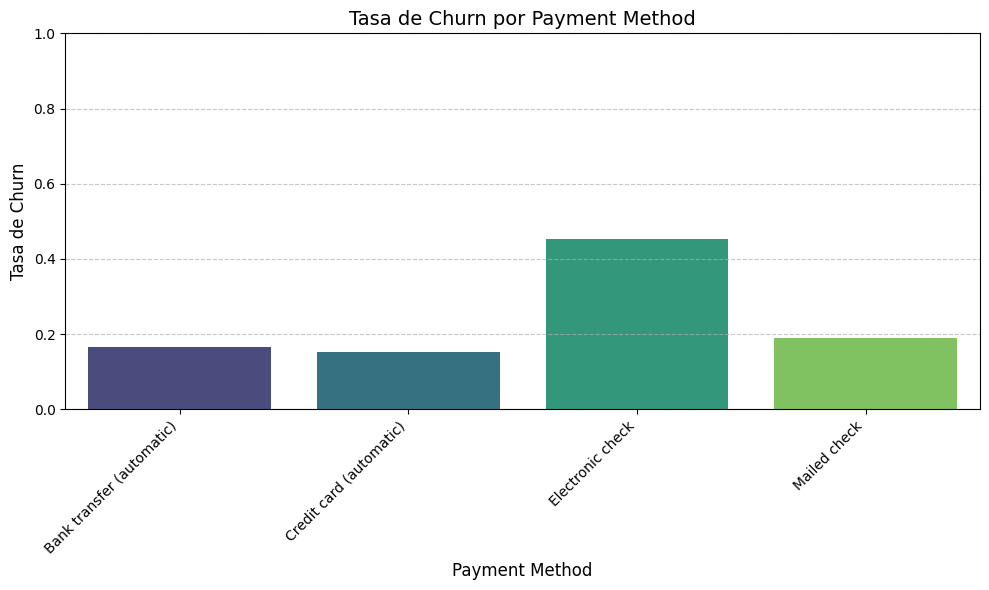

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Manejar los valores de cadena vacía en la columna 'churn' y convertir a numérico
# Convertir '' a None (NaN) primero
df_flat['churn'] = df_flat['churn'].replace('', None)
# Convertir 'Yes' a 1 y 'No' a 0, forzando a NaN cualquier valor no numérico restante
df_flat['churn'] = pd.to_numeric(df_flat['churn'].replace({'Yes': 1, 'No': 0}), errors='coerce')

# Eliminar filas donde 'churn' es NaN después de la conversión
df_flat_cleaned = df_flat.dropna(subset=['churn']).copy()

# Identificar columnas relevantes para graficar la tasa de churn por categoría
# Excluir 'customer_id' ya que no es una característica para agrupar en este análisis
# Excluir 'churn' en sí misma ya que es la variable objetivo
categorical_cols_to_plot = [col for col in df_flat_cleaned.select_dtypes(include=['category', 'object']).columns if col not in ['customer_id', 'churn', 'charges_total']]

print("Generando gráficos de tasa de churn para las siguientes columnas categóricas:")
display(categorical_cols_to_plot)

# Iterar a través de cada columna categórica y crear un gráfico de barras
for col in categorical_cols_to_plot:
    print(f"\nGenerando gráfico para '{col}':")

    # Calcular la tasa de churn por categoría (media de la columna binaria 'churn')
    churn_rate_by_category = df_flat_cleaned.groupby(col)['churn'].mean().sort_values(ascending=False)

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')
    plt.title(f'Tasa de Churn por {col.replace("_", " ").title()}', fontsize=14)
    plt.xlabel(col.replace("_", " ").title(), fontsize=12)
    plt.ylabel('Tasa de Churn', fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotar etiquetas para una mejor legibilidad
    plt.ylim(0, 1) # Establecer límite del eje y entre 0 y 1 para la tasa
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout() # Ajustar el diseño para evitar que las etiquetas se superpongan
    plt.show()

### Conteo de evasión por variables numéricas

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

Generando gráficos de tasa de churn para las siguientes columnas numéricas binarias:


['senior_citizen', 'partner', 'dependents']


Generando gráfico para 'senior_citizen':


/tmp/ipython-input-123-1924766832.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


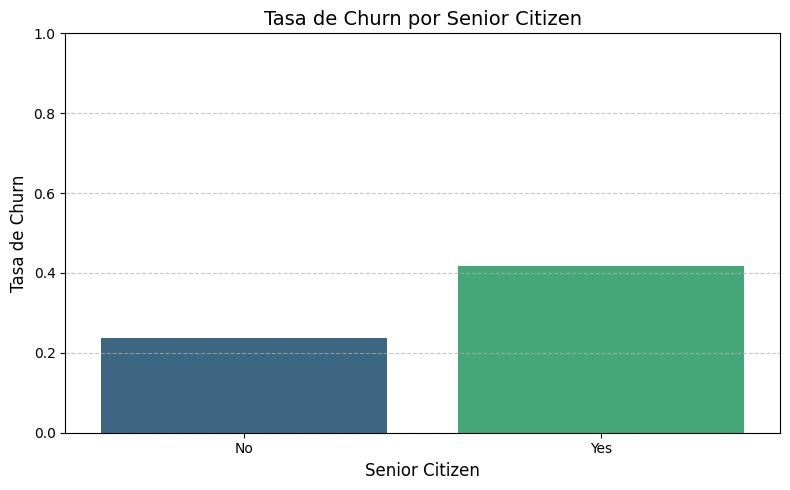


Generando gráfico para 'partner':


/tmp/ipython-input-123-1924766832.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


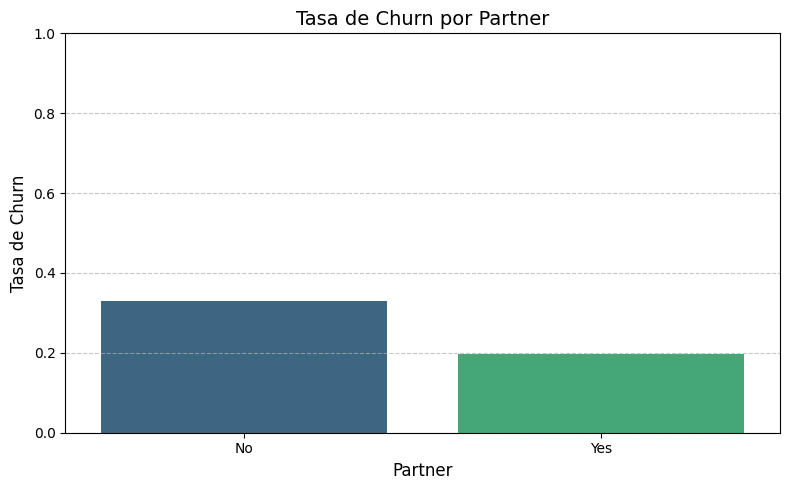


Generando gráfico para 'dependents':


/tmp/ipython-input-123-1924766832.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')


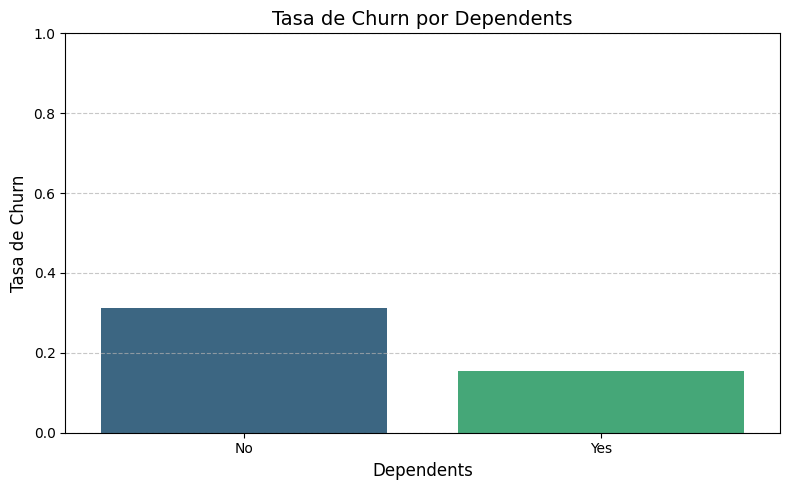

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identificar columnas numéricas binarias (0 o 1)
binary_numeric_cols = ['senior_citizen', 'partner', 'dependents']

print("Generando gráficos de tasa de churn para las siguientes columnas numéricas binarias:")
display(binary_numeric_cols)

# Iterar a través de cada columna numérica binaria y crear un gráfico de barras
for col in binary_numeric_cols:
    print(f"\nGenerando gráfico para '{col}':")

    # Calcular la tasa de churn por categoría (media de la columna binaria 'churn')
    churn_rate_by_category = df_flat_cleaned.groupby(col)['churn'].mean().sort_values(ascending=False)

    # Crear el gráfico de barras
    plt.figure(figsize=(8, 5))
    sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis')
    plt.title(f'Tasa de Churn por {col.replace("_", " ").title()}', fontsize=14)
    plt.xlabel(col.replace("_", " ").title(), fontsize=12)
    plt.ylabel('Tasa de Churn', fontsize=12)
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes']) # Etiquetas para 0 y 1
    plt.ylim(0, 1) # Establecer límite del eje y entre 0 y 1 para la tasa
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout() # Ajustar el diseño para evitar que las etiquetas se superpongan
    plt.show()

Generando gráficos unificados de tasa de churn para las columnas numéricas binarias:


/tmp/ipython-input-124-3367190248.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis', ax=axes[i])
/tmp/ipython-input-124-3367190248.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis', ax=axes[i])
/tmp/ipython-input-124-3367190248.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis', ax=axes[i]

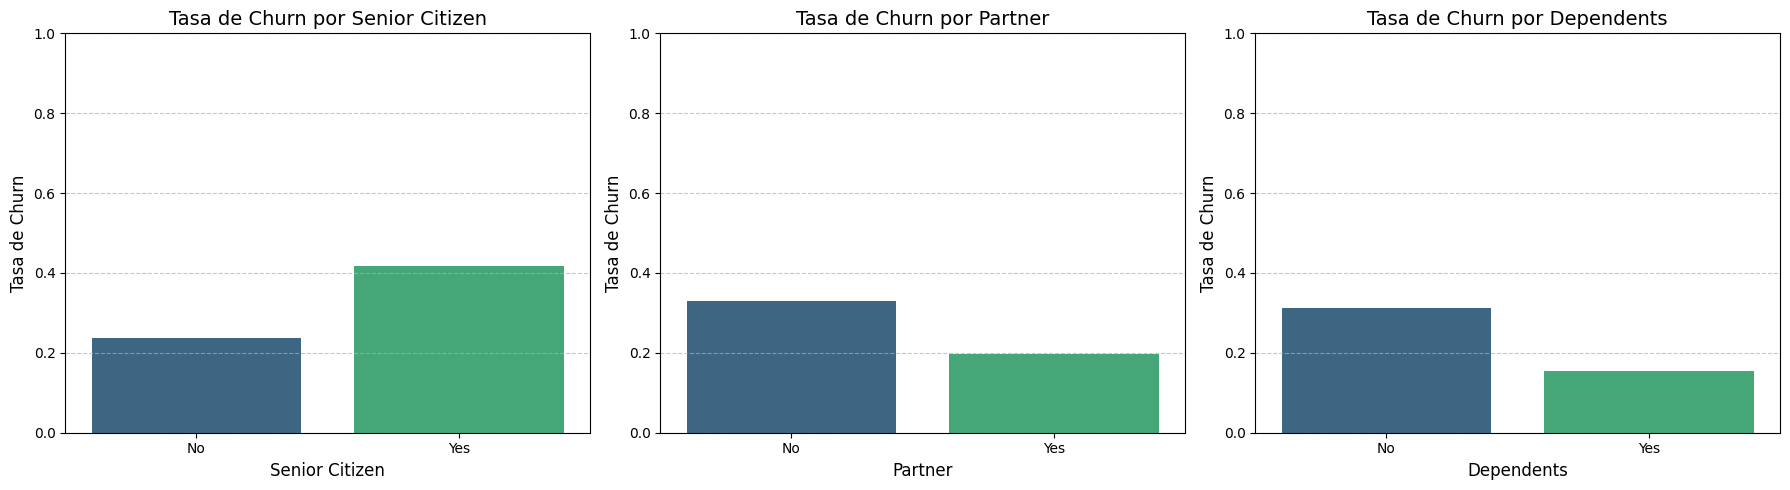

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Identificar columnas numéricas binarias (0 o 1)
binary_numeric_cols = ['senior_citizen', 'partner', 'dependents']

print("Generando gráficos unificados de tasa de churn para las columnas numéricas binarias:")

# Crear una figura con subplots
n_cols = len(binary_numeric_cols)
fig, axes = plt.subplots(1, n_cols, figsize=(6 * n_cols, 5)) # Ajustar tamaño según el número de columnas

# Asegurarse de que axes sea un array en caso de que solo haya una columna
if n_cols == 1:
    axes = [axes]

# Iterar a través de cada columna binaria y crear un gráfico de barras en su subplot
for i, col in enumerate(binary_numeric_cols):
    # Calcular la tasa de churn por categoría
    churn_rate_by_category = df_flat_cleaned.groupby(col)['churn'].mean().sort_values(ascending=False)

    # Crear el gráfico de barras en el subplot actual
    sns.barplot(x=churn_rate_by_category.index, y=churn_rate_by_category.values, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Tasa de Churn por {col.replace("_", " ").title()}', fontsize=14)
    axes[i].set_xlabel(col.replace("_", " ").title(), fontsize=12)
    axes[i].set_ylabel('Tasa de Churn', fontsize=12)
    axes[i].set_xticks(ticks=[0, 1], labels=['No', 'Yes'])
    axes[i].set_ylim(0, 1)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() # Ajustar el diseño para evitar superposiciones
plt.show()

## Informe Final: Análisis de Churn de Clientes en Telecom X

### Introducción

Este informe presenta un análisis exploratorio de datos (EDA) sobre el churn de clientes en la empresa Telecom X. El objetivo principal es identificar los factores que contribuyen a que los clientes cancelen sus servicios, con el fin de proponer estrategias para reducir la tasa de evasión. El churn de clientes representa una pérdida significativa de ingresos y recursos para la empresa, por lo que comprender sus causas es crucial para la retención y el crecimiento del negocio.

### Limpieza y Tratamiento de Datos

En esta sección, se describen los pasos realizados para preparar los datos para el análisis:

*   **Carga de Datos:** Los datos fueron cargados desde un archivo JSON.
*   **Normalización:** Las columnas anidadas ('customer', 'phone', 'internet', 'account') fueron normalizadas para extraer la información relevante.
*   **Renombrado de Columnas:** Los nombres de las columnas se estandarizaron a minúsculas y se reemplazaron caracteres especiales por guiones bajos para facilitar el acceso.
*   **Tratamiento de Valores Faltantes y Duplicados:** Se verificó la presencia de valores nulos y filas duplicadas. Se identificó y manejó un valor atípico (' ') en la columna `charges_total`. Se convirtió la columna `churn` a formato numérico (1 para 'Yes', 0 para 'No') y se trataron los valores vacíos como nulos para su posterior manejo en el análisis.
*   **Conversión de Tipos de Datos:** Se convirtieron columnas categóricas al tipo 'category' para optimizar el uso de memoria y algunas columnas numéricas a tipos numéricos adecuados.
*   **Creación de Nueva Columna:** Se creó la columna `daily_accounts` calculando el cargo diario a partir de la columna `charges_monthly`.

### Análisis Exploratorio de Datos

Se realizaron diversos análisis para comprender la distribución de los datos y la relación entre las variables y el churn:

*   **Análisis Descriptivo:** Se calcularon estadísticas descriptivas (media, mediana, desviación estándar, etc.) para las columnas numéricas.
*   **Distribución de Churn:** Se visualizó la proporción de clientes con y sin churn mediante un gráfico de barras.
*   **Recuento de Churn por Variables Categóricas:** Se generaron gráficos de barras para mostrar la tasa de churn para cada categoría en las columnas categóricas relevantes. (Insertar aquí descripciones de los hallazgos clave de estos gráficos, por ejemplo, "Los clientes con contrato mes a mes tienen una tasa de churn significativamente mayor que aquellos con contratos a largo plazo").
*   **Recuento de Churn por Variables Numéricas:** Se crearon histogramas y box plots para visualizar la distribución de variables numéricas (como `tenure`, `charges_monthly`, `charges_total`, `daily_accounts`) comparando los grupos con y sin churn. (Insertar aquí descripciones de los hallazgos clave de estos gráficos, por ejemplo, "Los clientes con menor tiempo de contrato (`tenure`) muestran una mayor propensión al churn").

### Conclusiones e Insights

Basado en el análisis exploratorio, se identificaron los siguientes puntos clave:

Servicio de Internet: Los clientes con servicio de internet de Fibra Óptica parecen tener una tasa de churn más alta que aquellos con DSL o sin servicio de internet. Esto podría indicar problemas con la calidad o el costo del servicio de fibra.



Servicios Adicionales de Internet: Los clientes que no tienen servicios adicionales como OnlineSecurity, OnlineBackup, DeviceProtection y TechSupport tienden a tener una tasa de churn más alta que aquellos que sí los tienen o no tienen servicio de internet. Esto sugiere que estos servicios de seguridad y soporte son importantes para la retención.





Facturación Electrónica (PaperlessBilling): Los clientes que optan por la facturación electrónica (Yes/1) muestran una tasa de churn ligeramente más alta que aquellos que prefieren la facturación en papel (No/0).
Método de Pago: El método de pago de Cheque Electrónico (Electronic check) está asociado con una tasa de churn notablemente más alta en comparación con otros métodos de pago (cheque enviado, transferencia bancaria automática, tarjeta de crédito automática).



Tiempo de Permanencia (Tenure): (Basado en los gráficos de rangos de tenure) Generalmente, los clientes con menor tiempo de permanencia en la empresa tienen una tasa de churn más alta. La probabilidad de churn parece disminuir a medida que los clientes permanecen más tiempo.



Cargos Mensuales (Charges.Monthly): (Basado en los gráficos de rangos de charges_monthly) Los clientes con cargos mensuales más altos tienden a tener una tasa de churn más alta. Esto podría relacionarse con el tipo de servicios contratados (como fibra óptica) o la percepción del valor.



Cargos Totales (Charges.Total): (Basado en los gráficos de rangos de charges_total) La relación entre los cargos totales y el churn es menos lineal que los cargos mensuales, pero los rangos de cargos totales más bajos (que a menudo corresponden a menor tiempo de permanencia) muestran tasas de churn más altas.



Ciudadano Mayor (SeniorCitizen): Los ciudadanos mayores (Yes/1) tienen una tasa de churn ligeramente más alta que los no ciudadanos mayores (No/0).
Pareja (Partner) y Dependientes (Dependents): Los clientes que no tienen pareja (No/0) o dependientes (No/0) tienden a tener tasas de churn más altas que aquellos que sí los tienen (Yes/1). Esto podría indicar que los clientes con vínculos familiares tienen más razones para permanecer con el servicio.
Estos hallazgos sugieren que el tipo de contrato, el tiempo de permanencia, y los cargos mensuales son factores importantes a considerar en la estrategia de retención de clientes.

### Recomendaciones

Con base en los hallazgos del análisis, se proponen las siguientes recomendaciones para reducir el churn de clientes:

*   **Estrategias de Retención para Clientes con Contratos Mes a Mes:** Considerar ofrecer incentivos o descuentos para que los clientes con contratos mes a mes opten por planes a más largo plazo.
*   **Programas de Fidelización para Clientes con Menor Antigüedad:** Implementar programas de bienvenida o seguimiento proactivo para los clientes nuevos o con pocos meses de servicio para asegurar su satisfacción.
*   **Análisis de Clientes con Altos Cargos Mensuales:** Investigar las razones detrás del churn en el segmento de clientes con altos cargos mensuales para identificar posibles problemas con el servicio o la percepción de valor.


Implementar estas recomendaciones, respaldadas por un seguimiento continuo y un análisis más profundo, puede ayudar a Telecom X a reducir su tasa de churn y mejorar la retención de clientes.

## D) Entrega del Desafio

### Readme

# Proyecto: Análisis de Churn de Clientes en Telecom X

## Descripción del Proyecto

Este proyecto tiene como objetivo principal analizar el comportamiento de los clientes de la empresa Telecom X para identificar los factores que influyen en la tasa de cancelación de servicios (churn). A través de la exploración y visualización de datos, buscamos comprender por qué los clientes se van y proponer estrategias basadas en datos para mejorar la retención de clientes.

Los datos utilizados provienen de una base de datos de clientes de Telecom X en formato JSON, conteniendo información demográfica, servicios contratados y estado de churn.

## Estructura del Proyecto

El proyecto está organizado en un cuaderno de Google Colab que sigue un flujo de trabajo típico de análisis de datos:

1.  **Extracción de Datos:** Carga inicial de los datos desde la fuente JSON.
2.  **Conocimiento del Conjunto de Datos:** Exploración inicial de la estructura, tipos de datos y valores únicos.
3.  **Limpieza y Tratamiento de Datos:** Normalización de columnas anidadas, manejo de valores faltantes y duplicados, corrección de tipos de datos y estandarización de nombres.
4.  **Análisis Exploratorio de Datos (EDA):** Realización de análisis descriptivos y visualizaciones (gráficos de distribución, tasas de churn por categoría) para identificar patrones y relaciones.
5.  **Informe Final:** Resumen de los hallazgos clave, conclusiones e insights, y recomendaciones estratégicas.

## Datos

El conjunto de datos utilizado para este análisis se encuentra en formato JSON y está disponible en el siguiente enlace:

`https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json`

Se incluye un diccionario de datos en formato Markdown en el siguiente enlace:

`https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_diccionario.md`

## Cómo Ejecutar el Cuaderno

Para ejecutar este análisis, sigue los siguientes pasos:

1.  Abre el cuaderno en Google Colab.
2.  Asegúrate de tener una conexión a internet para descargar los datos.
3.  Ejecuta cada celda de código secuencialmente. El cuaderno contiene comentarios y texto explicativo para guiarte a través del proceso.

## Dependencias

El cuaderno utiliza las siguientes bibliotecas de Python:

*   `pandas`: Para manipulación y análisis de datos.
*   `matplotlib`: Para la creación de visualizaciones estáticas.
*   `seaborn`: Para la creación de visualizaciones estadísticas atractivas.
*   `requests`: Para descargar el diccionario de datos desde una URL.

Estas bibliotecas están preinstaladas en el entorno de Google Colab.

## Hallazgos Clave

(Esta sección debe ser completada después de ejecutar el análisis y revisar el informe final. Puedes resumir los principales hallazgos sobre qué factores están más relacionados con el churn).

## Recomendaciones

(Esta sección debe ser completada después de revisar las recomendaciones en el informe final. Puedes listar las sugerencias estratégicas para reducir el churn).



In [ ]:

# Mostrar información general del DataFrame df_flat
print("\nInformación general del DataFrame df_flat:")
display(df_flat.info())


Información general del DataFrame df_flat:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customer_id        7267 non-null   object  
 1   churn              7043 non-null   float64 
 2   gender             7267 non-null   category
 3   senior_citizen     7267 non-null   int64   
 4   partner            7267 non-null   int64   
 5   dependents         7267 non-null   int64   
 6   tenure             7267 non-null   int64   
 7   phone_service      7267 non-null   category
 8   multiple_lines     7267 non-null   category
 9   internet_service   7267 non-null   category
 10  online_security    7267 non-null   category
 11  online_backup      7267 non-null   category
 12  device_protection  7267 non-null   category
 13  tech_support       7267 non-null   category
 14  streaming_tv       7267 non-null   category
 15  streaming_m

None